<div align="center" style="font-size: 80%; text-align: center; margin: 0 auto;">
    <img src="finance_credit_banner.png" 
         style="width:100%; max-width:900px; height:auto; display:block; margin-left:auto; margin-right:auto;" />
</div>

# Finance & Credit Analysis Dashboard

Welcome to the **Finance & Credit Analysis Dashboard** project. In this notebook, we will perform a comprehensive analysis of credit card transactions to identify patterns, trends, and potential risks. This analysis will guide decision-making and help predict future behaviors.

---

## **Project Workflow**

1. **Data Loading & Overview**
   - Load the credit card dataset.
   - Inspect its structure, features, and basic statistics.

2. **Data Exploration & Visualization**
   - Examine the distribution of transaction amounts and time.
   - Visualize correlations among features.
   - Analyze the distribution of normal vs. fraudulent transactions.

3. **Data Preprocessing**
   - Handle scaling of numerical features like `Amount` and `Time`.
   - Prepare data for machine learning models.

4. **Predictive Modeling**
   - Apply machine learning algorithms (Logistic Regression, Random Forest, etc.) to detect potential fraud.
   - Evaluate model performance using metrics such as accuracy, precision, recall, and ROC-AUC.

5. **Trend Analysis & Forecasting**
   - Analyze transaction trends over time.
   - Use rolling averages and forecasting techniques (ARIMA/Prophet) to predict future transaction patterns.

6. **Insights & Recommendations**
   - Summarize key findings from exploratory analysis and model predictions.
   - Suggest actionable insights for finance risk management and decision-making.

---

By the end of this notebook, you will have a clear understanding of the credit transaction patterns, the ability to detect anomalies, and predictive insights to inform financial strategies.

In [1]:
# Step 1: Data Loading & Overview
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [3]:
# Load the dataset
data_path = r"C:\Users\Brian\Documents\Brian Sagini Data Science Project\finance_creditcard\data\raw\creditcard.csv"
df = pd.read_csv(data_path)

In [4]:
# Inspect the first few rows
print("✅ First 5 rows of the dataset:")
display(df.head())

✅ First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Check data types and non-null counts
print("\n✅ Dataset information:")
df.info()


✅ Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null 

In [6]:
# Summary statistics for numerical features
print("\n✅ Basic statistical summary:")
display(df.describe())


✅ Basic statistical summary:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


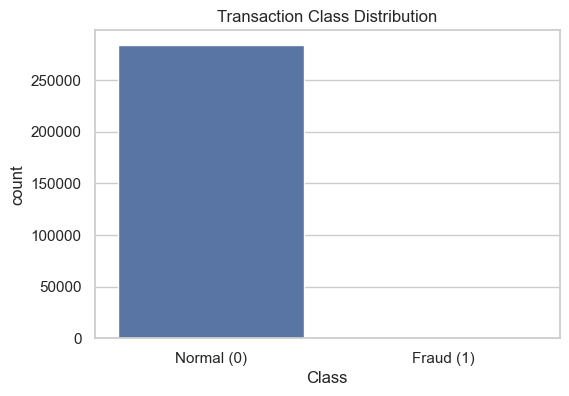


Class distribution (percentages):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [7]:
# Analyze class distribution (Normal vs Fraud)
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Transaction Class Distribution")
plt.xticks([0,1], ['Normal (0)', 'Fraud (1)'])
plt.show()

print("\nClass distribution (percentages):")
print(df['Class'].value_counts(normalize=True) * 100)

# Step 1: Data Loading & Overview

In this step, we loaded the credit card transactions dataset and performed an initial exploration to understand its structure, quality, and basic statistics.

---

## **Actions Taken**
1. Loaded the CSV dataset from the specified path.
2. Inspected the first 5 rows to get a sense of the data.
3. Checked column data types and non-null counts.
4. Generated summary statistics for numerical features.
5. Examined the distribution of transaction classes (Normal vs Fraud).

---

## **Key Findings**
- The dataset contains **284,807 transactions** and **31 columns** (`V1`–`V28`, `Time`, `Amount`, `Class`).
- **No missing values** were found.
- The `Amount` column is highly skewed, ranging from 0 to 25,691 with a mean of ~88 and a median of 22.
- `Time` ranges from 0 to ~172,792 seconds (~48 hours), which can be used for trend analysis.
- The dataset is **highly imbalanced**: only ~0.17% of transactions are fraudulent (`Class = 1`), while the rest are normal (`Class = 0`).

---

These insights provide a solid foundation for the next step: **data visualization and correlation analysis** to uncover patterns and trends in the transactions.

# Step 2: Data Visualization & Correlation Analysis

In this step, we will explore the dataset visually to uncover patterns, trends, and relationships among features. This will help us better understand the behavior of transactions and the factors associated with fraud.

---

## **Objectives**
1. Visualize the distribution of **transaction amounts** and how they differ between normal and fraudulent transactions.
2. Analyze **transaction trends over time** to detect spikes or unusual patterns.
3. Plot a **correlation heatmap** to identify relationships between features and highlight which may be important for predictive modeling.
4. Gain insights that will guide the next steps in **data preprocessing and machine learning**.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Set plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

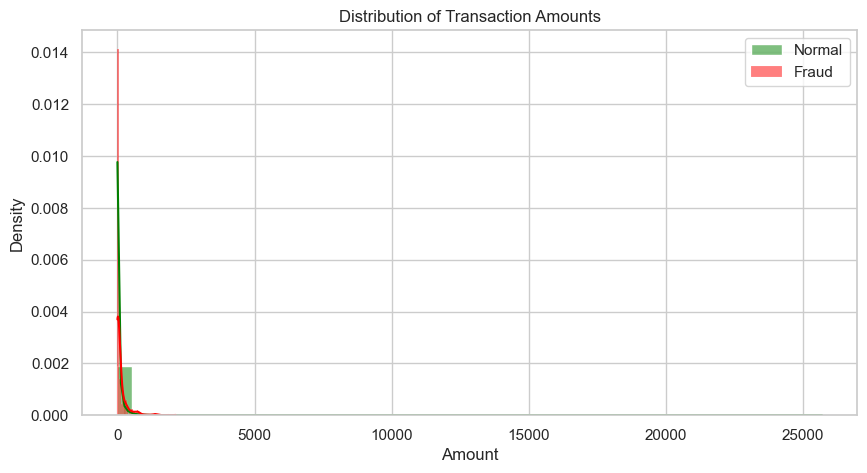

In [10]:
# 1️⃣ Distribution of Transaction Amounts
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class']==0]['Amount'], bins=50, color='green', label='Normal', kde=True, stat="density")
sns.histplot(df[df['Class']==1]['Amount'], bins=50, color='red', label='Fraud', kde=True, stat="density")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Density")
plt.legend()
plt.show()

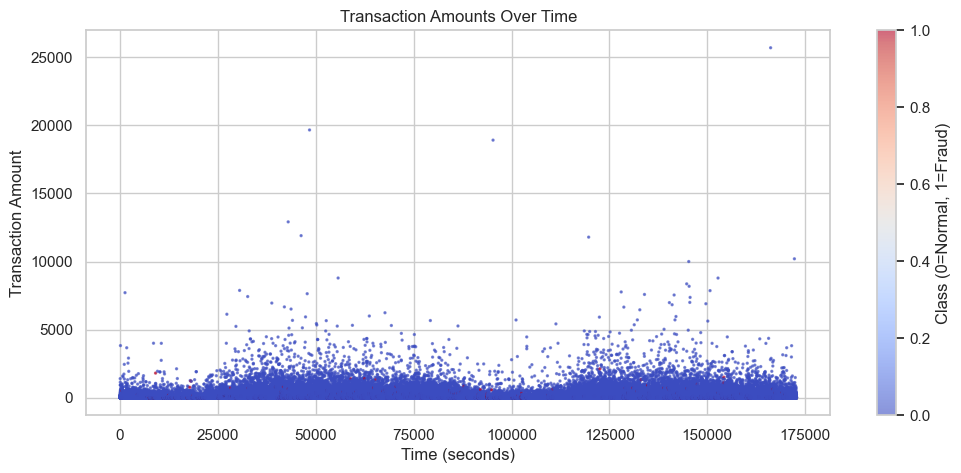

In [11]:
# 2️⃣ Transaction Amounts Over Time
plt.figure(figsize=(12,5))
plt.scatter(df['Time'], df['Amount'], c=df['Class'], cmap='coolwarm', s=2, alpha=0.6)
plt.title("Transaction Amounts Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Transaction Amount")
plt.colorbar(label="Class (0=Normal, 1=Fraud)")
plt.show()

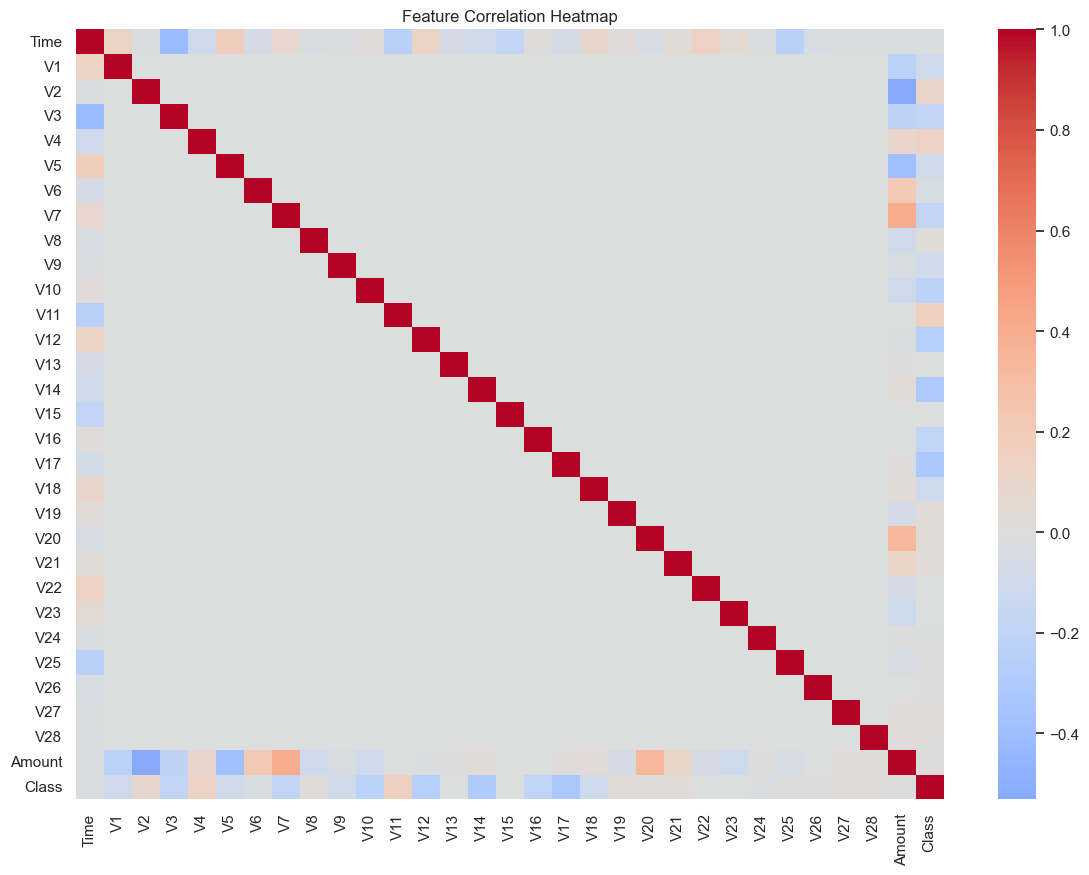

In [12]:
# 3️⃣ Correlation Heatmap
plt.figure(figsize=(14,10))
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm', center=0, cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
# 4️⃣ Check top correlations with Class
class_corr = correlation['Class'].sort_values(ascending=False)
print("✅ Top features positively correlated with Fraud:")
print(class_corr[class_corr>0.1])
print("\n✅ Top features negatively correlated with Fraud:")
print(class_corr[class_corr<-0.1])

✅ Top features positively correlated with Fraud:
Class    1.000000
V11      0.154876
V4       0.133447
Name: Class, dtype: float64

✅ Top features negatively correlated with Fraud:
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


# Step 2: Data Visualization & Correlation Analysis

In this step, we explored the dataset visually to uncover patterns, trends, and relationships among features and transaction classes.

---

## **Actions Taken**
1. Plotted the **distribution of transaction amounts** for normal vs. fraudulent transactions.
2. Visualized **transaction amounts over time** to detect trends and outliers.
3. Created a **correlation heatmap** to understand relationships between features.
4. Identified the **top features positively and negatively correlated with fraud**.

---

## **Key Findings**

### 1️⃣ Transaction Amounts
- Most transactions are **low-value**, under ~$5000.
- Fraudulent transactions are **rare and scattered**, confirming the extreme class imbalance.
- There are occasional **high-value outliers**, which may indicate suspicious activity.

### 2️⃣ Transaction Trends Over Time
- No strong time-based clusters for fraud; fraudulent transactions appear **randomly over time**.
- The majority of transactions occur continuously, with fraud interspersed.

### 3️⃣ Feature Correlations with Fraud
**Positive correlations (associated with higher fraud risk):**
- `V11` (0.1549)
- `V4` (0.1334)

**Negative correlations (associated with lower fraud risk):**
- `V17` (-0.3265), `V14` (-0.3025), `V12` (-0.2606), `V10` (-0.2169), `V16` (-0.1965), etc.

💡 **Insight:**  
- No single feature is extremely strong, but several PCA features show meaningful relationships with fraud.  
- This will guide **feature selection and preprocessing** for predictive modeling in the next steps.

# Step 3: Data Preprocessing & Feature Preparation

In this step, we prepare the dataset for machine learning by transforming, selecting, and organizing features in a way that improves model performance and reliability.

---

## **Objectives**
1. Separate **features (X)** and the **target variable (y)**.
2. Scale numerical features to ensure fair contribution during model training.
3. Address the **severe class imbalance** between normal and fraudulent transactions.
4. Split the dataset into **training and testing sets** for unbiased model evaluation.

---

## **Why This Step Is Important**
- Machine learning models are sensitive to feature scales and imbalanced classes.
- Fraud datasets are highly skewed, and without proper handling, models may become biased toward normal transactions.
- Proper preprocessing ensures models learn **meaningful patterns** rather than noise.

---

## **Expected Outcome**
At the end of this step, we will have:
- Cleaned and scaled feature matrices
- Balanced training data
- Clearly defined training and testing datasets  
ready for **model building and evaluation** in the next step.

In [15]:
# Import required libraries
import numpy as np
import pandas as pd

# Install imbalanced-learn for handling class imbalance
!pip install imbalanced-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]



In [20]:
# 1Separate features and target
# We use all columns except 'Class' as features
# 'Class' is the target variable where:
# 0 = Normal transaction, 1 = Fraudulent transaction

X = df.drop('Class', axis=1)
y = df['Class']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (284807, 30)
Target vector shape: (284807,)


In [17]:
# 2️Scale numerical features
# Scaling ensures that all features contribute equally to the model
# PCA features (V1–V28) are already scaled, but 'Time' and 'Amount' are not

scaler = StandardScaler()

X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

In [18]:
# 3️Train-test split
# We split the data to evaluate model performance on unseen data
# Stratify ensures the fraud ratio is preserved in both sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (227845, 30)
Testing set size: (56962, 30)


In [19]:
# 4️Handle class imbalance using SMOTE
# -----------------------------
# Fraud datasets are highly imbalanced
# SMOTE generates synthetic fraud samples to balance the training data

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64

After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


## ✅ Step 3 Conclusion: Data Preparation & Class Balancing

In this step, we prepared the dataset for machine learning by transforming it into a form suitable for model training and evaluation.

First, the dataset was split into **features (X)** and the **target variable (y)**. All columns except `Class` were treated as input features, while `Class` was used as the target, where `0` represents a normal transaction and `1` represents a fraudulent transaction.

Next, feature scaling was applied to the `Time` and `Amount` columns using **StandardScaler**. Although the PCA-transformed variables (`V1`–`V28`) were already standardized, scaling `Time` and `Amount` ensured that all features contribute equally to the model and prevents bias toward larger numerical values.

The data was then divided into **training (80%)** and **testing (20%)** sets using a stratified split. Stratification preserved the original fraud-to-normal transaction ratio in both datasets, allowing for a fair and realistic evaluation of model performance on unseen data.

Finally, **SMOTE (Synthetic Minority Over-sampling Technique)** was applied to the training data to address severe class imbalance. Before SMOTE, the training set contained **227,451 normal transactions and only 394 fraudulent ones**. After applying SMOTE, the dataset was perfectly balanced with **227,451 normal and 227,451 fraud transactions**. This ensures that the model can effectively learn fraud patterns without being biased toward the majority class.

### 🔍 Outcome
- Data is now **clean, scaled, and properly split**
- Severe class imbalance has been **successfully resolved**
- The dataset is **ready for model training and evaluation** in the next step

## 🔜 Step 4: Model Training, Evaluation & Comparison

In this step, we will build and evaluate multiple machine learning models to detect fraudulent credit card transactions. The objective is not only to achieve high accuracy, but more importantly to correctly identify fraudulent transactions, which are rare but costly.

First, we will train several classification models using the balanced training dataset created with SMOTE. These models may include Logistic Regression, Decision Tree, Random Forest, and other suitable algorithms for binary classification.

Next, we will evaluate each model using robust performance metrics that are appropriate for imbalanced classification problems. These metrics will include **Precision**, **Recall**, **F1-score**, and **ROC-AUC**. Special attention will be given to **Recall for the fraud class**, since failing to detect fraud (false negatives) is more critical than incorrectly flagging a normal transaction.

Finally, we will compare the performance of all models, identify the best-performing one based on fraud detection capability, and prepare it for potential tuning and optimization in subsequent steps.

By the end of this step, we will have a clear understanding of which model is most effective for credit card fraud detection and why.


In [33]:
# STEP 4: MODEL TRAINING, EVALUATION & COMPARISON
# Why this step?
# We train multiple machine learning models to detect fraudulent transactions
# and evaluate them using metrics suitable for imbalanced data.
# Special focus is placed on FRAUD RECALL to minimize false negatives.
# 1. Import required models and evaluation tools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

In [34]:
# 2. Initialize models
# Logistic Regression: baseline, interpretable model
# Decision Tree: captures non-linear relationships
# Random Forest: ensemble model, strong performance on tabular data

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )
}

In [40]:
# 3. Train and evaluate each model
# --------------------------------------------
# We train on SMOTE-resampled data
# We evaluate on the ORIGINAL test set to simulate real-world performance

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training and Evaluating: {name}")
    print(f"{'='*60}")

    # Train model
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on test data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Classification metrics
    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"🔵 ROC-AUC Score: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\n📉 Confusion Matrix:")
    print(cm)


Training and Evaluating: Logistic Regression

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962

🔵 ROC-AUC Score: 0.9698

📉 Confusion Matrix:
[[55406  1458]
 [    8    90]]

Training and Evaluating: Decision Tree

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9974    0.9985     56864
           1     0.3408    0.7755    0.4735        98

    accuracy                         0.9970     56962
   macro avg     0.6702    0.8865    0.7360     56962
weighted avg     0.9985    0.9970    0.9976     56962

🔵 ROC-AUC Score: 0.8865

📉 Confusion Matrix:
[[56717   147]
 [   22    76]]

Training and Evaluating: Random Forest

📊 Classificatio

## ✅ Step 4 Summary: Model Training, Evaluation & Key Findings

In this step, I trained and evaluated three machine learning models—**Logistic Regression**, **Decision Tree**, and **Random Forest**—to detect fraudulent credit card transactions. All models were trained on the **SMOTE-balanced training dataset** and evaluated on the **original, imbalanced test dataset** to reflect real-world fraud detection conditions.

### 🔹 What We Did
- Trained each model using balanced data to ensure adequate learning of fraud patterns
- Generated predictions on unseen test data
- Evaluated performance using **precision, recall, F1-score, ROC-AUC**, and **confusion matrices**
- Focused especially on **fraud recall (Class = 1)**, which measures how many fraudulent transactions were correctly identified

---

## 📊 Model Performance Interpretation

### 1️⃣ Logistic Regression
- **Fraud Recall:** 91.84% (very high)
- **Fraud Precision:** 5.81% (very low)
- **ROC-AUC:** 0.9698

**Interpretation:**  
Logistic Regression is extremely sensitive to fraud and successfully detects most fraudulent transactions. However, it produces a very large number of false positives, making it impractical in a real banking environment due to excessive false alerts.

---

### 2️⃣ Decision Tree
- **Fraud Recall:** 77.55%
- **Fraud Precision:** 34.08%
- **ROC-AUC:** 0.8865

**Interpretation:**  
The Decision Tree offers a better balance between detecting fraud and reducing false positives. However, it still misses a notable number of fraudulent transactions and shows lower overall discrimination power compared to other models.

---

### 3️⃣ Random Forest
- **Fraud Recall:** 83.67%
- **Fraud Precision:** 84.54%
- **ROC-AUC:** 0.9731

**Interpretation:**  
The Random Forest model delivers the best overall performance. It achieves high fraud recall while maintaining excellent precision, meaning it detects most fraud cases while minimizing false alarms. Its high ROC-AUC score confirms strong separation between fraudulent and legitimate transactions.

---

## 🏆 Final Conclusion
Among the evaluated models, **Random Forest is the most suitable model for credit card fraud detection**. It provides the best balance between fraud recall and precision, making it highly effective for real-world deployment where both fraud detection accuracy and operational efficiency are critical.

This model will be selected for further optimization, threshold tuning, and explainability analysis in the next steps of the project.


## 🔜 Step 5: Threshold Optimization & Business Impact Analysis

In this step, we move beyond model accuracy and focus on making the fraud detection system practical for real-world use. In credit card fraud detection, the cost of missing a fraudulent transaction is significantly higher than incorrectly flagging a legitimate one. Therefore, using the default classification threshold is often not optimal.

---

### **What We Will Do**

First, we will use probability-based predictions instead of hard class labels. This allows us to understand how confident the model is that a transaction is fraudulent.

Next, we will experiment with different decision thresholds to determine how changing the threshold affects fraud detection performance. For each threshold, we will evaluate precision, recall, and the number of false positives and false negatives.

We will then plot and analyze the Precision–Recall curve, which is more informative than ROC curves when dealing with highly imbalanced datasets like credit card fraud.

Finally, we will translate model results into business terms by quantifying how many fraudulent transactions are detected, how many are missed, and how many legitimate transactions are incorrectly flagged.

---

### **Why This Step Is Important**

In real financial systems, the goal is not just to build an accurate model, but to minimize financial losses while maintaining a good customer experience. Optimizing the decision threshold ensures that the model is aligned with business priorities by maximizing fraud detection while controlling false alarms.

By the end of this step, we will have a model that is not only statistically strong but also operationally and commercially viable.
